In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
mnist = input_data.read_data_sets('MNIST_data',one_hot=True)

<font size=6>一、	多层感知机用于 MINSTT手写数字数据集分类（提交实现步骤描述以及下面要求提交的结果）</font>

In [16]:
num_classes = 10  # 输出大小
input_size = 784  # 输入大小
hidden_units_size = 256  # 隐藏层节点数量
batch_size = 100
training_iterations = 10000

X = tf.placeholder(tf.float32, shape = [None, input_size])
y = tf.placeholder(tf.float32, shape = [None, num_classes])
#第一层256
W1 = tf.Variable(tf.random_normal ([input_size, hidden_units_size], stddev = 0.1))
B1 = tf.Variable(tf.constant (0.1,shape=[hidden_units_size]))
hidden_opt1 = tf.matmul(X, W1) + B1  
hidden_opt1 = tf.nn.relu(hidden_opt1)  
#第二层256
W2 = tf.Variable(tf.random_normal ([hidden_units_size, hidden_units_size], stddev = 0.1))
B2 = tf.Variable(tf.constant (0.1,shape=[hidden_units_size]) )
hidden_opt2 = tf.matmul(hidden_opt1, W2) + B2  
hidden_opt2 = tf.nn.relu(hidden_opt2)  
#输出层10
W3=tf.Variable(tf.random_normal([hidden_units_size,num_classes]))
B3=tf.Variable(tf.constant(0.1,shape=[10]))
y_p=tf.matmul(hidden_opt2,W3)+B3
#y_p=tf.nn.softmax(tf.matmul(hidden_opt2,W3)+B3)


# 对输出层计算交叉熵损失
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_p))
# 梯度下降算法，这里使用了反向传播算法用于修改权重，减小损失
opt = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

#y_p=tf.nn.softmax(y_p)
#cross_entropy = tf.reduce_mean(-tf.reduce_sum(y*tf.log(y_p),reduction_indices=[1]))
#train_step = tf.train.AdamOptimizer(0.01).minimize(cross_entropy)

init = tf.global_variables_initializer()
# 计算准确率
correct_prediction =tf.equal (tf.argmax (y, 1), tf.argmax(y_p, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))

cost_list_test=[]
cost_list_train=[]
accur_list_test=[]
accur_list_train=[]

sess = tf.Session ()
sess.run (init)
for i in range (2000) :
    batch = mnist.train.next_batch (100)
    batch_input = batch[0]
    batch_labels = batch[1]
    # 训练
    training_loss = sess.run ([opt,loss], feed_dict = {X: batch_input, y: batch_labels})
    #training_loss = sess.run ([train_step,cross_entropy], feed_dict = {X: batch_input, y: batch_labels})
    if i % 10 == 0 :
        test_accuracy = accuracy.eval (session = sess, feed_dict = {X:mnist.test.images, y:mnist.test.labels})
        train_accuracy = accuracy.eval (session = sess, feed_dict = {X: batch_input, y: batch_labels})
        cost_list_train.append(training_loss[1])
        cost_list_test.append(sess.run ([opt,loss], feed_dict = {X:mnist.test.images, y:mnist.test.labels})[1])
        accur_list_train.append(train_accuracy)
        accur_list_test.append(test_accuracy)
        if i% 500 == 0:
          print("step : %d, training loss = %g " % (i,cost_list_train[-1]))
          print("step : %d, testing loss = %g " % (i, cost_list_test[-1]))
          print("step : %d, training accuracy = %g " % (i, accur_list_train[-1]))
          print("step : %d, testing accuracy = %g " % (i, accur_list_test[-1]))



step : 0, training loss = 19.4287 
step : 0, testing loss = 48.6643 
step : 0, training accuracy = 0.23 
step : 0, testing accuracy = 0.1506 
step : 500, training loss = 0.241689 
step : 500, testing loss = 0.173039 
step : 500, training accuracy = 0.99 
step : 500, testing accuracy = 0.9455 
step : 1000, training loss = 0.106698 
step : 1000, testing loss = 0.114709 
step : 1000, training accuracy = 0.99 
step : 1000, testing accuracy = 0.9641 
step : 1500, training loss = 0.223329 
step : 1500, testing loss = 0.0964008 
step : 1500, training accuracy = 0.99 
step : 1500, testing accuracy = 0.9703 


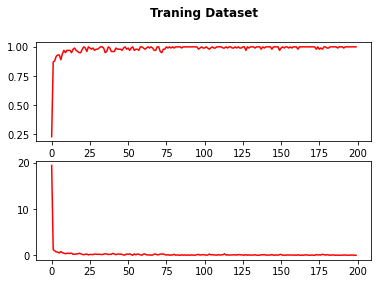

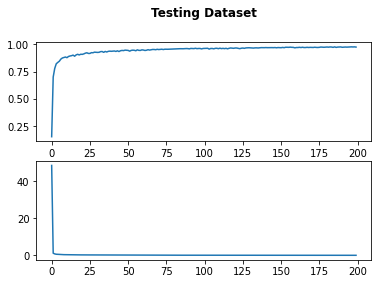

In [17]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(2,1)
plt.title('Traning Dataset',fontsize='large',y=2.4,fontweight='bold') 
ax[0].plot(accur_list_train,'r')
ax[1].plot(cost_list_train,'r')
plt.show()

fig,ax=plt.subplots(2,1)
plt.title('Testing Dataset',fontsize='large',y=2.4,fontweight='bold') 
ax[0].plot(accur_list_test)
ax[1].plot(cost_list_test)
plt.show()

<font size=6>二、	卷积神经网络用于 MINISTT手写数字数据集分类（提交实现步骤描述以及下面要求提交的结果）</font>


---
tf.nn.max_pool(value, ksize, strides, padding, name=None)
参数是四个，和卷积很类似：

1. 第一个参数value：需要池化的输入，一般池化层接在卷积层后面，所以输入通常是feature map，依然是[batch, height, width, channels]这样的shape

2. 第二个参数ksize：池化窗口的大小，取一个四维向量，一般是[1, height, width, 1]，因为我们不想在batch和channels上做池化，所以这两个维度设为了1

3. 第三个参数strides：和卷积类似，窗口在每一个维度上滑动的步长，一般也是[1, stride,stride, 1]

4. 第四个参数padding：和卷积类似，可以取'VALID' 或者'SAME'

返回一个Tensor，类型不变，shape仍然是[batch, height, width, channels]这种形式


---



tf.nn.conv2d(input, filter, strides, padding, use_cudnn_on_gpu=None, name=None)
除去name参数用以指定该操作的name，与方法有关的一共五个参数：

1. input：
指需要做卷积的输入图像，它要求是一个Tensor，具有[batch, in_height, in_width, in_channels]这样的shape，具体含义是[训练时一个batch的图片数量, 图片高度, 图片宽度, 图像通道数]，注意这是一个4维的Tensor，要求类型为float32和float64其中之一

2. filter：
相当于CNN中的卷积核，它要求是一个Tensor，具有[filter_height, filter_width, in_channels, out_channels]这样的shape，具体含义是[卷积核的高度，卷积核的宽度，图像通道数，卷积核个数]，要求类型与参数input相同，有一个地方需要注意，第三维in_channels，就是参数input的第四维

3. strides：卷积时在图像每一维的步长，这是一个一维的向量，长度4

padding：
string类型的量，只能是”SAME”,”VALID”其中之一，这个值决定了不同的卷积方式（后面会介绍）

4. use_cudnn_on_gpu：
bool类型，是否使用cudnn加速，默认为true

结果返回一个Tensor，这个输出，就是我们常说的feature map


---



1. input = tf.Variable(tf.random_normal([1,3,3,5]))
input的第4维是通道个数

filter = tf.Variable(tf.random_normal([1,1,5,1]))
filter的第3维是通道个数，对应input的第3维；第4维是输出的feature map的个数


---



In [ ]:
def compute_accuracy(v_xs,v_ys):
    global y_p
    y_pre = sess.run(y_p,feed_dict={X:v_xs, keep_prob:1})
    correct_prediction = tf.equal(tf.argmax(y_pre,1),tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    result = sess.run(accuracy,feed_dict={X:v_xs,y:v_ys,keep_prob:1})
    return result


##输入
X = tf.placeholder(tf.float32,[None,784])#28*28
y = tf.placeholder(tf.float32,[None,10])#10个输出
#-1代表样本数不定，28*28大小的图片，1表示通道数
x_image = tf.reshape(X,[-1,28,28,1])
keep_prob = tf.placeholder(tf.float32)
#第一层卷积
#对输入的单通道图片 卷积核 5×5 1通道 32个数，输出32个featu map 后续对应32通道
W_c1=tf.Variable(tf.truncated_normal([5,5,1,32],stddev=0.1))
b_c1=tf.Variable(tf.constant(0.1,shape=[32]))
active_c1=tf.nn.conv2d(x_image,W_c1,strides=[1,1,1,1],padding="SAME")
out_c1=tf.nn.relu(active_c1+b_c1)
out_p1=tf.nn.max_pool(out_c1,ksize=[1,2,2,1],strides=[1,2,2,1],padding="SAME")
#第二层卷积
#对输入的32通道图片 卷积核5×5 32通道 64个数，输出64个feature map 后续对应64通道
W_c2=tf.Variable(tf.truncated_normal([5,5,32,64],stddev=0.1))
b_c2=tf.Variable(tf.constant(0.1,shape=[64]))
active_c2=tf.nn.conv2d(out_p1,W_c2,strides=[1,1,1,1],padding="SAME")
out_c2=tf.nn.relu(active_c2+b_c2)
out_p2=tf.nn.max_pool(out_c2,ksize=[1,2,2,1],strides=[1,2,2,1],padding="SAME")
#全连接层
W_fc1=tf.Variable(tf.truncated_normal([7*7*64,1024],stddev=0.1))
b_fc1=tf.Variable(tf.constant(0.1,shape=[1024]))
out_p2_flat=tf.reshape(out_p2,[-1,7*7*64])
out_fc1=tf.nn.relu(tf.matmul(out_p2_flat,W_fc1)+b_fc1)
out_fc1_drop=tf.nn.dropout(out_fc1,keep_prob);
#softmax输出层
W_fc2=tf.Variable(tf.truncated_normal([1024,10],stddev=0.1))
b_fc2=tf.Variable(tf.constant(0.1,shape=[10]))
y_p=tf.nn.softmax(tf.matmul(out_fc1_drop,W_fc2)+b_fc2)
#loss函数
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y*tf.log(y_p),reduction_indices=[1]))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
sess = tf.Session()
sess.run(tf.initialize_all_variables())

cost_list_test=[]
cost_list_train=[]
accur_list_test=[]
accur_list_train=[]

for i in range(1000):
    batch_xs,batch_ys = mnist.train.next_batch(100)#从下载好的数据集提取100个数据，mini_batch
    #print(batch_xs.shape)
    sess.run(train_step,feed_dict={X:batch_xs,y:batch_ys,keep_prob:0.25})
    if i %1 == 0:
      test_accuracy = compute_accuracy(mnist.test.images, mnist.test.labels)
      train_accuracy = compute_accuracy(batch_xs, batch_ys)
      cost_list_train.append(sess.run ([train_step,cross_entropy], feed_dict = {X: batch_xs, y: batch_ys,keep_prob:0.25})[1])
      cost_list_test.append(sess.run ([train_step,cross_entropy], feed_dict = {X:mnist.test.images, y:mnist.test.labels,keep_prob:0.25})[1])
      accur_list_train.append(train_accuracy)
      accur_list_test.append(test_accuracy)
      if i%100==0:
        print(compute_accuracy(mnist.test.images, mnist.test.labels))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use `tf.global_variables_initializer` instead.
0.0686
0.9315
0.9554
0.9631
0.9705
0.9746
0.9782
0.9825
0.9841
0.9881


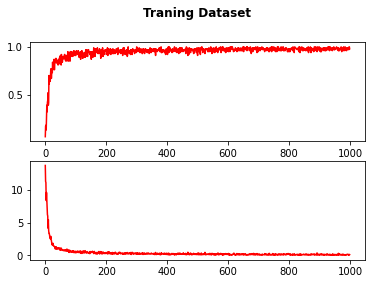

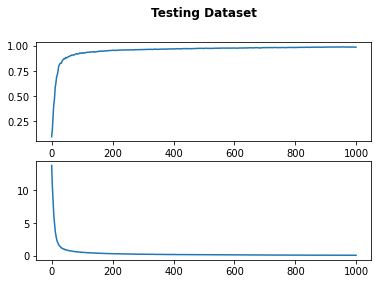

In [ ]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(2,1)
plt.title('Traning Dataset',fontsize='large',y=2.4,fontweight='bold') 
ax[0].plot(accur_list_train,'r')
ax[1].plot(cost_list_train,'r')
plt.show()

fig,ax=plt.subplots(2,1)
plt.title('Testing Dataset',fontsize='large',y=2.4,fontweight='bold') 
ax[0].plot(accur_list_test)
ax[1].plot(cost_list_test)
plt.show()

<font size=6> 三、	多层感知机实现异或运算（提交实现步骤描述、源代码以及最后的测试误差）</font>

In [18]:
import numpy as np
import random
import matplotlib.pyplot as plt
#referrence:https://zhuanlan.zhihu.com/p/109822533
#sigmoid激活函数
def sigmoid(x):
  return 1 / (1 + np.exp(-x))
#sigmoid激活函数导数
def diff_sigmoid(x):
  fx = sigmoid(x)
  return fx * (1 - fx)
#计算误差
def mse_loss(y_true, y_pred):
  return ((y_true - y_pred) ** 2).mean()

#隐藏层
class hidden:
  '''
  func：激活函数
  shape：[input_num,hidden_num]
  '''
  def __init__(self,X=None,y=None,lr=0.05,func=sigmoid,diff_func=diff_sigmoid,shape=None):
    self.W=np.random.rand(shape[0],shape[1])
    self.b=np.random.rand(1,shape[1])
    self.x=X
    self.y=y
    self.lr=lr
    self.func=func
    self.diff_func=diff_func
    self.BP_val=1 #反向传播，向下一层传播
    self.a=0  #保存(Wx+b)

  #正向传播，输出
  def output(self):
    self.a=(np.matmul(self.x,self.W))+self.b
    self.y=self.func(self.a)
    return self.y
  #梯度下降的方法更新网络参数，根据链式求导将偏导返回给下一层
  def update(self,bp_val):
    #误差平方和关于这一层W b偏导数的计算
    delta_b=bp_val*self.diff_func(self.a)
    delta_W=delta_b*self.x.T
    self.W-=self.lr*delta_W
    self.b-=self.lr*delta_b    
    self.BP_val=delta_b*self.W
    #下一层梯度下降需要的偏导数
    self.BP_val=self.BP_val.sum(axis=1)
    return self.BP_val

  #正向传播
  def run_forward(self,X):
    self.x=X
    return self.output()
  
  #反向传播
  def run_backward(self,bp_val):
    return self.update(bp_val)

#输出层
class optLayer(hidden):
  #输出层的更新方法有所不同
  def update(self,t):
    #根据误差平方和求偏导
    delta_b=(self.y-t)*self.diff_func(self.a)
    delta_W=delta_b*self.x.T
    self.W-=self.lr*delta_W
    self.b-=self.lr*delta_b
    self.BP_val=delta_b*self.W.T
    return self.BP_val

  def run_backward(self,bp_val):
    return self.update(bp_val)
    
#构建包含输出层、隐藏层的网络
class net:
  '''
  shape=[输入维度，隐藏层个数，隐藏层个数，......]
  '''
  def __init__(self,lr,shape,X=None,y=None):
    self.epoch=0
    self.lr=lr
    self.x=X
    self.y=y
    self.layer=[None]*(len(shape))
    self.loss_history=[]
    #初始化每一层的shape,每一层的W b
    self.layer[-1]=optLayer(shape=[shape[-1],1])#输出层
    for i in range(len(shape)-1):
      self.layer[i]=hidden(shape=[shape[i],shape[i+1]])#隐藏层

  #包括正向传播 反向传播
  def run(self):
    y_pred=self.layer[0].run_forward(self.x)    
    for i in range(len(self.layer)-1):
      y_pred=self.layer[i+1].run_forward(y_pred)
    bp=self.y
    for i in reversed(self.layer):
      bp=i.run_backward(bp)
    return y_pred
    
  def putin(self,X,y):
    self.x=np.array([X])
    self.y=np.array([y])

  #支持batch输入
  def feed_batch(self,X,y,batch_size=1):
    self.epoch+=1
    for i in range(batch_size):
      self.putin(X[i],y[i])
      self.run()
    if self.epoch%1==0:
      self.x=X
      p_pred=self.layer[0].run_forward(self.x)    
      for i in range(len(self.layer)-1):
        p_pred=self.layer[i+1].run_forward(p_pred)
      self.loss_history.append(mse_loss(y,p_pred))
      if self.epoch%1000==0:
        print("loss:",self.loss_history[-1])
    return
      
  #画出误差的图像
  def plot_loss(self):
    plt.plot(self.loss_history,'r-')
    plt.show()
    return

loss: 0.22050371248386125
loss: 0.14364857786783874
loss: 0.024413688022166775
loss: 0.007919176614246664
loss: 0.004416890330842479
loss: 0.003001697102667052
loss: 0.002252947662052557
loss: 0.0017942987253716863
loss: 0.0014862825745014083
loss: 0.001265954029455774


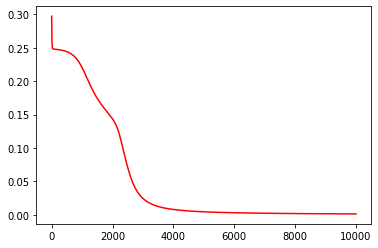

In [19]:
X=np.array([[0,0],[1,0],[0,1],[1,1],[0,0],[0,0],[1,1],[0,1],[1,0],[1,0],[1,1],[0,1],[0,0]])
y=np.array([[0],[1],[1],[0],[0],[0],[0],[1],[1],[1],[0],[1],[0]])
shape=[2,2]
bp_nn=net(lr=0.1,shape=shape,X=X,y=y)
for i in range(10000):
  bp_nn.feed_batch(X=X,y=y,batch_size=len(y))
bp_nn.plot_loss()

In [20]:
bp_nn.putin([0,1],[1])
print("[0,1] prediction:",bp_nn.run())


[0,1] prediction: [[0.96467548]]


In [21]:
bp_nn.putin([1,0],[1])
print("[1,0] prediction:",bp_nn.run())

[1,0] prediction: [[0.96444233]]


In [22]:
bp_nn.putin([0,0],[0])
print("[0,0] prediction:",bp_nn.run())

[0,0] prediction: [[0.03407978]]


In [23]:
bp_nn.putin([1,1],[0])
print("[1,1] prediction:",bp_nn.run())

[1,1] prediction: [[0.03776495]]
